In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from keras.datasets import imdb

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: F

In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=None)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
word_index = imdb.get_word_index(path='imdb_word_indx.json')

In [4]:
list_positive = [len(i) for i in x_train[np.where(y_train == 1)]]
list_negative = [len(i) for i in x_train[np.where(y_train == 0)]]

In [5]:
positive_count = Counter(list_positive)
negative_count = Counter(list_negative)

print("The most frequent length for positive review is {} words and it occurs {} times."\
.format(positive_count.most_common(1)[0][0], positive_count.most_common(1)[0][1]))
print("The most frequent length for negative review is {} words and it occurs {} times."\
.format(negative_count.most_common(1)[0][0], negative_count.most_common(1)[0][1]))

The most frequent length for positive review is 125 words and it occurs 95 times.
The most frequent length for negative review is 132 words and it occurs 105 times.


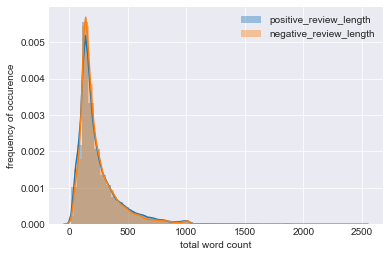

In [6]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1)
sns.distplot(list_positive, label='positive_review_length')
sns.distplot(list_negative, label='negative_review_length')
ax.legend()
ax.set(xlabel='total word count', ylabel='frequency of occurence')
plt.show()